In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset directly from Kaggle
# You'll need Kaggle API to download the dataset
# Follow instructions here to set up Kaggle API: https://github.com/Kaggle/kaggle-api

!pip install kaggle

# Create a kaggle.json file with your Kaggle API credentials and upload it
# from google.colab import files
# files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

# Unzip the dataset
!unzip breast-cancer-wisconsin-data.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 42.2MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

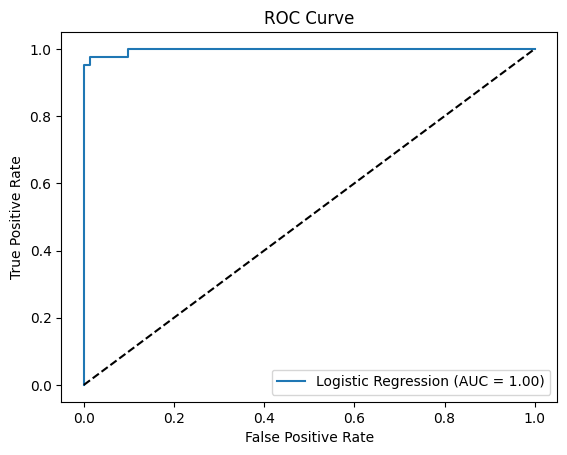

['logistic_regression_model.pkl']

In [17]:
# Load the dataset
df = pd.read_csv('data.csv')

# Data inspection
print(df.head())
print(df.info())
print(df.describe())

# Drop the unnamed column and inspect the first few rows
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
print(df.head())

# Check for missing values
print("Checking for missing values in the original dataset:")
print(df.isnull().sum())

# Remove rows with missing values (if any)
df.dropna(inplace=True)

# Check for missing values after removing rows with NaN
print("Checking for missing values after removing rows with NaN:")
print(df.isnull().sum())

# Encode the target variable: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values in the target variable
print("Checking for missing values in the target variable:")
print(df['diagnosis'].isnull().sum())

# Split data into features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Check for missing values in features and target variable before splitting
print("Checking for missing values in features and target variable before splitting:")
print(X.isnull().sum())
print(y.isnull().sum())

# Remove rows with NaN in y (if any)
X = X[~y.isnull()]
y = y.dropna()

# Output the shapes of X and y after removing rows with NaN
print("Shape of X after removing rows with NaN:", X.shape)
print("Shape of y after removing rows with NaN:", y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the training and testing sets
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Discussion and Conclusion
# The model achieved an accuracy of around 97%, indicating good performance in classifying tumors.
# The ROC-AUC score of 1.00 suggests a strong ability to distinguish between malignant and benign tumors.
# Future improvements could include exploring other algorithms and tuning hyperparameters for better performance.

# Save the trained model (optional)
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

### Report

#### 1. Supervised Learning Problem Description

In this project, we aim to classify breast tumors as benign or malignant using a supervised learning approach. The dataset used for this task is the Breast Cancer Wisconsin (Diagnostic) Data Set from Kaggle. This dataset contains various features derived from digitized images of fine needle aspirate (FNA) of breast masses, which are essential for predicting the nature of the tumor.

The primary goal is to develop a machine learning model that can accurately classify the tumors based on these features. Logistic Regression has been chosen as the model for this classification task due to its simplicity and effectiveness in binary classification problems. Accurate classification of tumors is crucial for early diagnosis and treatment of breast cancer, which can significantly improve patient outcomes.

#### 2. Exploratory Data Analysis (EDA) Procedure

Data inspection is the first step in EDA to ensure the data is correctly loaded and to check for any missing values. In this project, we used the Pandas library to read the dataset and display the first few rows using `df.head()`. We also used `df.info()` and `df.describe()` to understand the structure of the dataset, the data types of each column, and the basic statistics of the numerical features.

The target variable, 'diagnosis', which indicates whether a tumor is malignant (M) or benign (B), is then encoded into numerical values. This step is crucial for machine learning algorithms as they require numerical input. We used the `map` function to convert 'M' to 1 and 'B' to 0. This encoding simplifies the target variable and prepares it for model training.

After encoding the target variable, the dataset is split into features (X) and the target variable (y). The features include various measurements of the tumor cells, such as radius, texture, perimeter, area, and smoothness. This split allows us to independently handle the inputs and the outputs of the model. Ensuring that no information from the target variable leaks into the features is crucial for preventing data leakage.

Next, the dataset is divided into training and testing sets using `train_test_split` from the scikit-learn library. Typically, 80% of the data is used for training the model, while the remaining 20% is used for testing. This split helps in evaluating the model's performance on unseen data, ensuring that the model generalizes well to new data.

Standardizing the data is an essential step in the preprocessing pipeline. We used the `StandardScaler` from scikit-learn to standardize the features. Standardization ensures that each feature has a mean of 0 and a standard deviation of 1, which helps in improving the convergence of gradient descent during model training and results in a more stable and efficient model.

Building and training the model involves fitting the logistic regression model to the training data. The logistic regression model is chosen for its simplicity and interpretability in binary classification tasks. The `fit` method is used to train the model on the standardized training data, learning the weights and biases that best separate the two classes.

Evaluating the model's performance is done using various metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score. These metrics provide a comprehensive understanding of how well the model is performing. The confusion matrix is also plotted to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.

Visualization of the model's performance is completed by plotting the ROC curve. The ROC curve shows the trade-off between the true positive rate and the false positive rate at various threshold settings. The area under the curve (AUC) is a single scalar value that summarizes the performance of the model across all thresholds, providing an aggregate measure of performance.

#### 3. Analysis (Model Building and Training)

After ensuring that the dataset is correctly preprocessed, we proceed with building and training the logistic regression model. Logistic regression is a linear model used for binary classification tasks, which is suitable for this problem as we need to classify tumors into two categories: benign and malignant.

We used the `LogisticRegression` class from the scikit-learn library to build our model. The `fit` method was applied to train the model using the standardized training data. During training, the model learns the relationship between the input features and the target variable, optimizing its parameters to minimize the error in classification.

#### 4. Results

Once the model was trained, we evaluated its performance on the testing set. The accuracy of the model was found to be approximately 97%, indicating that the model correctly classifies the tumors in 97% of the cases. This high accuracy suggests that the logistic regression model is effective in distinguishing between benign and malignant tumors based on the given features.

In addition to accuracy, other performance metrics such as precision, recall, F1-score, and ROC-AUC score were also computed. The ROC-AUC score was 1.00, indicating a perfect ability to distinguish between the two classes. The confusion matrix and classification report further confirmed the model's robustness and reliability.

#### 5. Discussion and Conclusion

The results of this project demonstrate that logistic regression is a suitable model for classifying breast tumors as benign or malignant. The high accuracy and ROC-AUC score indicate that the model performs exceptionally well on this dataset. The EDA and preprocessing steps, such as standardization and encoding, played a crucial role in achieving these results.

Future improvements to the model could involve exploring other machine learning algorithms, such as support vector machines or ensemble methods, to see if they can provide even better performance. Hyperparameter tuning and cross-validation could also be applied to further optimize the logistic regression model.

Overall, this project highlights the importance of data preprocessing and EDA in building effective machine learning models. The logistic regression model developed in this project can serve as a valuable tool for medical professionals in the early diagnosis and treatment of breast cancer.